In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
food = pd.read_csv('../data13/chipotle.tsv', sep='\t')  #tsv파일이기 때문에 탭을 기준으로 나눔
food

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [3]:
food.shape

(4622, 5)

In [4]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
order_id              4622 non-null int64
quantity              4622 non-null int64
item_name             4622 non-null object
choice_description    3376 non-null object
item_price            4622 non-null object
dtypes: int64(2), object(3)
memory usage: 180.6+ KB


In [5]:
food.head(10)
# food.tail(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [6]:
food.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [7]:
food.index

RangeIndex(start=0, stop=4622, step=1)

In [8]:
food.index

RangeIndex(start=0, stop=4622, step=1)

In [9]:
food['order_id'] = food['order_id'].astype(str)  #astype = 시리즈의 멤버함수
food['order_id'].head()

0    1
1    1
2    1
3    1
4    2
Name: order_id, dtype: object

In [10]:
# 데이터  전체 기본 통계로 요약
food.describe() # 모든 숫자타입을 가지는 피쳐에 대해 기본 통계를 보임.

,quantity
count,4622.000000
mean,1.075725
std,0.410186
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,15.000000


# 메뉴가 무엇이 있었나?

In [11]:
food['item_name'].unique()
len(food['item_name'].unique())

50

# 주문은 몇 개나 있었던 것일까?

In [12]:
len(food['order_id'].unique())

1834

In [13]:
from matplotlib import font_manager, rc #한글처리
f_path = 'C:/Windows/Fonts/HANDotum.ttf'
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font',family = font_name)
plt.rcParams['axes.unicode_minus'] = False

# 가장 많이 주문한 메뉴명?

In [14]:
item_count = food['item_name'].value_counts()  # 항목별 개수 + 내림차순 적용 = value_counts()
item_count.head(10)

Chicken Bowl           726
Chicken Burrito        553
Chips and Guacamole    479
Steak Burrito          368
Canned Soft Drink      301
Chips                  211
Steak Bowl             211
Bottled Water          162
Chicken Soft Tacos     115
Chicken Salad Bowl     110
Name: item_name, dtype: int64

In [15]:
item_count= item_count[:10]
item_count

Chicken Bowl           726
Chicken Burrito        553
Chips and Guacamole    479
Steak Burrito          368
Canned Soft Drink      301
Chips                  211
Steak Bowl             211
Bottled Water          162
Chicken Soft Tacos     115
Chicken Salad Bowl     110
Name: item_name, dtype: int64

In [16]:
type(item_count)

pandas.core.series.Series

In [17]:
item_count.index.tolist()

['Chicken Bowl',
 'Chicken Burrito',
 'Chips and Guacamole',
 'Steak Burrito',
 'Canned Soft Drink',
 'Chips',
 'Steak Bowl',
 'Bottled Water',
 'Chicken Soft Tacos',
 'Chicken Salad Bowl']

In [18]:
item_count.values

array([726, 553, 479, 368, 301, 211, 211, 162, 115, 110], dtype=int64)

In [19]:
type(item_count.values)

numpy.ndarray

# 많이 팔린 item 10개를 막대 그래프로 그려보자.

<BarContainer object of 10 artists>

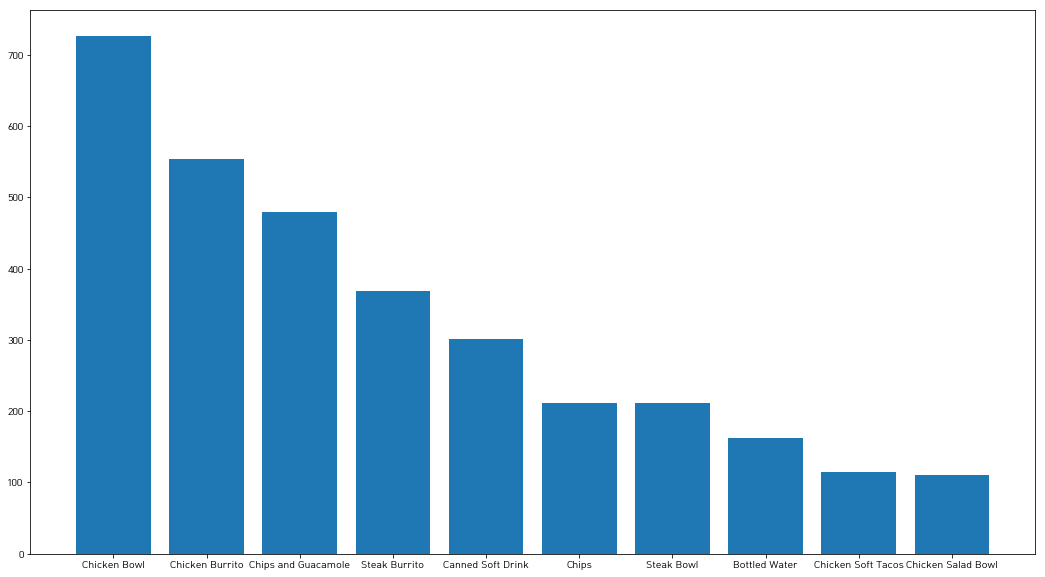

In [20]:
plt.figure(figsize = (18,10))
plt.bar(item_count.index, item_count.values) # plt.bar(x축값, y축값)

# 순위별로 프린트

In [21]:
# 순위별로 프린트해보세요.
# TOP 1 : Chicken Bowl 726
item_list = item_count.index.tolist()
count_list = item_count.values.tolist()
for i in range (0,10):
    print('TOP',i+1,' : ', item_list[i],' ',count_list[i])


TOP 1  :  Chicken Bowl   726
TOP 2  :  Chicken Burrito   553
TOP 3  :  Chips and Guacamole   479
TOP 4  :  Steak Burrito   368
TOP 5  :  Canned Soft Drink   301
TOP 6  :  Chips   211
TOP 7  :  Steak Bowl   211
TOP 8  :  Bottled Water   162
TOP 9  :  Chicken Soft Tacos   115
TOP 10  :  Chicken Salad Bowl   110


## enumerate 반복문 : index와 item을 동시에 반복하며 꺼내줄 때

In [22]:
# enumerate : 반복문!!!! index와 반복할 item을 둘 다 꺼내주고 싶을 때 사용
data100 = [100, 200, 300]

for i, item in enumerate(data100, 0): # 0은 index의 start 값
    print(i, ' : ', item)

0  :  100
1  :  200
2  :  300


In [23]:
# enumerate : 열거하다, Jquery의 $('list').each() : index랑 list 항목을 하나씩 꺼내오는 것
# 시리즈의 values만 꺼내오고 싶으면, 시리즈를 enumerate에 입력값으로 넣어주면 됨.
# 시리즈를 tolist()하면 시리즈의 values만 리스트로 만들어진다.
# iteritems() = item에 시리즈의 index와 values를 tuple로 반복해서 꺼내온다.
for i , item in enumerate(item_count.iteritems(),0):
    print('TOP ', i+1 ,':',item)

TOP  1 : ('Chicken Bowl', 726)
TOP  2 : ('Chicken Burrito', 553)
TOP  3 : ('Chips and Guacamole', 479)
TOP  4 : ('Steak Burrito', 368)
TOP  5 : ('Canned Soft Drink', 301)
TOP  6 : ('Chips', 211)
TOP  7 : ('Steak Bowl', 211)
TOP  8 : ('Bottled Water', 162)
TOP  9 : ('Chicken Soft Tacos', 115)
TOP  10 : ('Chicken Salad Bowl', 110)


In [24]:
for i , item in enumerate(item_count.iteritems(),0):
    print('TOP ', i+1 ,':',item[0],item[1])  #튜플의 0번, 1번

TOP  1 : Chicken Bowl 726
TOP  2 : Chicken Burrito 553
TOP  3 : Chips and Guacamole 479
TOP  4 : Steak Burrito 368
TOP  5 : Canned Soft Drink 301
TOP  6 : Chips 211
TOP  7 : Steak Bowl 211
TOP  8 : Bottled Water 162
TOP  9 : Chicken Soft Tacos 115
TOP  10 : Chicken Salad Bowl 110


In [25]:
for i , (pre, post) in enumerate(item_count.iteritems(),0):
    print('TOP ', i+1 ,':',pre, post) 

TOP  1 : Chicken Bowl 726
TOP  2 : Chicken Burrito 553
TOP  3 : Chips and Guacamole 479
TOP  4 : Steak Burrito 368
TOP  5 : Canned Soft Drink 301
TOP  6 : Chips 211
TOP  7 : Steak Bowl 211
TOP  8 : Bottled Water 162
TOP  9 : Chicken Soft Tacos 115
TOP  10 : Chicken Salad Bowl 110


In [26]:
df = item_count.to_frame()
df

,item_name
Chicken Bowl,726
Chicken Burrito,553
Chips and Guacamole,479
Steak Burrito,368
Canned Soft Drink,301
Chips,211
Steak Bowl,211
Bottled Water,162
Chicken Soft Tacos,115
Chicken Salad Bowl,110


In [27]:
# 그룹으로 묶으면 내림차순을 따로 해주어야 함.
df2 = food[['item_name','quantity']].groupby('item_name').count().sort_values('quantity',ascending=False)[:10]
df2

,quantity
item_name,
Chicken Bowl,726
Chicken Burrito,553
Chips and Guacamole,479
Steak Burrito,368
Canned Soft Drink,301
Steak Bowl,211
Chips,211
Bottled Water,162
Chicken Soft Tacos,115


In [28]:
# 제일 많이 팔린 메뉴명
item_count.index[0]

'Chicken Bowl'

In [29]:
# 제일 많이 팔린 개수
item_count.values[0]

726

# item당 주문개수, 주문총량

## 주문개수

In [30]:
# item당 주문개수, 주문총량을 구해보세요.
order_count2 = food.groupby('item_name')['quantity'].count()
                #item_name의 값으로 그룹을 지어서, 그룹별 quantity만 count해라!
order_count2

item_name
6 Pack Soft Drink                         54
Barbacoa Bowl                             66
Barbacoa Burrito                          91
Barbacoa Crispy Tacos                     11
Barbacoa Salad Bowl                       10
Barbacoa Soft Tacos                       25
Bottled Water                            162
Bowl                                       2
Burrito                                    6
Canned Soda                              104
Canned Soft Drink                        301
Carnitas Bowl                             68
Carnitas Burrito                          59
Carnitas Crispy Tacos                      7
Carnitas Salad                             1
Carnitas Salad Bowl                        6
Carnitas Soft Tacos                       40
Chicken Bowl                             726
Chicken Burrito                          553
Chicken Crispy Tacos                      47
Chicken Salad                              9
Chicken Salad Bowl                       110


## 주문총량

In [31]:
# item당 주문개수, 주문총량을 구해보세요.
order_count3 = food.groupby('item_name')['quantity'].sum()
                #item_name의 값으로 그룹을 지어서, 그룹별 quantity만 sum해라!
order_count3[:10]

item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64

In [32]:
food['quantity'].sum()

4972

# 모든 메뉴(50개)의 판매량 그래프

Text(0,0.5,'주문한 메뉴의 판매량')

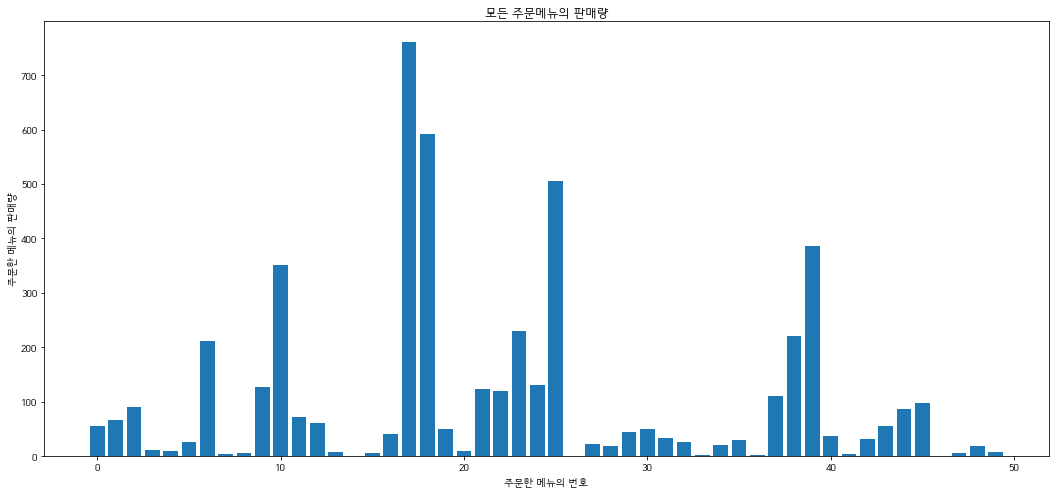

In [33]:
# 50개를 그려봅시다!
# X축 : 50개의 메뉴명 => 숫자를 부여하자! 너무 많음!
x2 = np.arange(50) #[0,1,2, ...]
# Y축 : 메뉴별 판매량 (order_count3)
y2 = order_count3.values

plt.figure(figsize=(18,8))
plt.bar(x2,y2)
plt.title('모든 주문메뉴의 판매량')
plt.xlabel('주문한 메뉴의 번호')
plt.ylabel('주문한 메뉴의 판매량')
#글자크기조절은 찾아보기

In [34]:
order_count3.index[17]

'Chicken Bowl'

In [35]:
order_count3.index[26]

'Chips and Mild Fresh Tomato Salsa'

# 데이터타입 변경해서 데이터프레임 덮어쓰기

In [36]:
food

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [37]:
food['item_price'].dtype  # 시리즈에 들어있는 인스턴스의 타입  O = object

dtype('O')

In [38]:
food['quantity'].dtype

dtype('int64')

In [39]:
type(food['item_price']) # 열에대한 타입

pandas.core.series.Series

In [40]:
food['item_price'][:5]

0     $2.39 
1     $3.39 
2     $3.39 
3     $2.39 
4    $16.98 
Name: item_price, dtype: object

**데이터타입 변경하기**

In [41]:
#타입변경 방법: 시리즈명.astype(), float()함수 이용

In [42]:
food['item_price'][4]

'$16.98 '

In [43]:
type(food['item_price'][4])

str

In [44]:
food['item_price'][4][1:]

'16.98 '

In [45]:
food['item_price'][4][1:].strip()

'16.98'

In [46]:
# 첫번째 방법
float(food['item_price'][4][1:].strip())

16.98

In [47]:
type(float(food['item_price'][4][1:].strip()))

float

**시리즈의 모든 행에 있는 string을 추출해서 숫자만 추출 (인덱싱 사용)**<br>
**시리즈를 모두 변경하기 위해서는 for문이 있어야 함**<br>
**float함수는 비파괴 = > 캐스팅한 결과를 리스트에 모아두고 반복문이 끝나면 리스트를 데이터프레임에 덮어씀**

In [48]:
result = []
for x in food['item_price']:
    result.append(float(x[1:].strip()))
result[:10]

[2.39, 3.39, 3.39, 2.39, 16.98, 10.98, 1.69, 11.75, 9.25, 9.25]

In [49]:
food['item_price'] = result

In [50]:
food['item_price']

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
5       10.98
6        1.69
7       11.75
8        9.25
9        9.25
10       4.45
11       8.75
12       8.75
13      11.25
14       4.45
15       2.39
16       8.49
17       8.49
18       2.18
19       8.75
20       4.45
21       8.99
22       3.39
23      10.98
24       3.39
25       2.39
26       8.49
27       8.99
28       1.09
29       8.49
        ...  
4592    11.75
4593    11.75
4594    11.75
4595     8.75
4596     4.45
4597     1.25
4598     1.50
4599     8.75
4600     4.45
4601     1.25
4602     9.25
4603     9.25
4604     8.75
4605     4.45
4606     1.25
4607    11.75
4608    11.25
4609     1.25
4610    11.75
4611    11.25
4612     9.25
4613     2.15
4614     1.50
4615     8.75
4616     4.45
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

In [51]:
food['item_price'].dtype

dtype('float64')

In [52]:
food.describe() #피쳐들 중에서 숫자타입을 가지는 시리즈의 기본 통계

,quantity,item_price
count,4622.000000,4622.000000
mean,1.075725,7.464336
std,0.410186,4.245557
min,1.000000,1.090000
25%,1.000000,3.390000
50%,1.000000,8.750000
75%,1.000000,9.250000
max,15.000000,44.250000


In [53]:
food[food['item_price']== 44.25]

,order_id,quantity,item_name,choice_description,item_price
3598,1443,15,Chips and Fresh Tomato Salsa,NaN,44.25


# 데이터 실습

## 주문당 평균 계산금액 출력하기

In [54]:
food.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [55]:
food['order_id'].dtype  # order_id = 오브젝트 타입

dtype('O')

In [56]:
# 오름차순으로 정렬해주기위해 order id 데이터타입을 int로 변경
order_number=[]
for x in food['order_id']:
    order_number.append(int(x))
food['order_id'] = order_number   

In [57]:
#order_id를 기준으로 그룹화하여 오름차순으로 item_price의 합계를 정리
df_order= food[['order_id','item_price']].groupby('order_id').sum().sort_values('order_id',ascending=True)
df_order.head()

,item_price
order_id,
1,11.56
2,16.98
3,12.67
4,21.00
5,13.70


In [58]:
df_order['order_count'] = food[['order_id','item_price']].groupby('order_id').count().sort_values('order_id',ascending=True)['item_price'].values.tolist()
# id로 그룹화하여 주문한 아이템수를 다 더하기위해 itme_price를 count()함수 사용 후 오름차순으로 정리.
# 결과는 데이터프레임형태로 나오기 때문에 'item_price'열을 따로 추출 후 값들을 묶어 array로 변환 후 list로 변경
# 변경한 list를 df_order에 추가해줌.

In [59]:
df_order.head()

,item_price,order_count
order_id,,
1,11.56,4
2,16.98,1
3,12.67,2
4,21.00,2
5,13.70,2


In [60]:
df_order['price_avg'] = df_order['item_price']/df_order['order_count']
# 주문당 평균 1메뉴 계산금액 = 총 주문금액 / 총 주문메뉴수
# 문제랑 별개로 혼자 잘못해석함
# ㅋㅋ

In [61]:
df_order.head()

,item_price,order_count,price_avg
order_id,,,
1,11.56,4,2.890
2,16.98,1,16.980
3,12.67,2,6.335
4,21.00,2,10.500
5,13.70,2,6.850


In [92]:
# 주문당 평균 계산금액!!
df_order['item_price'].mean()

18.81142857142869

## 한 주문에 40달러 이상 사용한 주문의 id들 출력하기

In [63]:
df_order[df_order['item_price']>= 40].index 
# 위에서 만든 df_order 데이터프레임 사용
# df_order의 item_price는 한 주문의 총 주문금액
# df_order의 index는 주문 id

Int64Index([ 103,  195,  205,  231,  343,  488,  491,  511,  561,  576,  577,
             635,  649,  688,  691,  708,  737,  759,  791,  806,  818,  823,
             848,  916,  926,  949,  953,  973,  996, 1006, 1051, 1170, 1176,
            1182, 1243, 1323, 1341, 1360, 1426, 1431, 1443, 1449, 1454, 1483,
            1511, 1559, 1586, 1601, 1655, 1660, 1764, 1786, 1825],
           dtype='int64', name='order_id')

# 각 아이템의 가격 구하기

In [64]:
food.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [65]:
len(food['item_name'].unique())  #메뉴의 종류는 50개

50

In [66]:
food['item_name'].unique().tolist()

['Chips and Fresh Tomato Salsa',
 'Izze',
 'Nantucket Nectar',
 'Chips and Tomatillo-Green Chili Salsa',
 'Chicken Bowl',
 'Side of Chips',
 'Steak Burrito',
 'Steak Soft Tacos',
 'Chips and Guacamole',
 'Chicken Crispy Tacos',
 'Chicken Soft Tacos',
 'Chicken Burrito',
 'Canned Soda',
 'Barbacoa Burrito',
 'Carnitas Burrito',
 'Carnitas Bowl',
 'Bottled Water',
 'Chips and Tomatillo Green Chili Salsa',
 'Barbacoa Bowl',
 'Chips',
 'Chicken Salad Bowl',
 'Steak Bowl',
 'Barbacoa Soft Tacos',
 'Veggie Burrito',
 'Veggie Bowl',
 'Steak Crispy Tacos',
 'Chips and Tomatillo Red Chili Salsa',
 'Barbacoa Crispy Tacos',
 'Veggie Salad Bowl',
 'Chips and Roasted Chili-Corn Salsa',
 'Chips and Roasted Chili Corn Salsa',
 'Carnitas Soft Tacos',
 'Chicken Salad',
 'Canned Soft Drink',
 'Steak Salad Bowl',
 '6 Pack Soft Drink',
 'Chips and Tomatillo-Red Chili Salsa',
 'Bowl',
 'Burrito',
 'Crispy Tacos',
 'Carnitas Crispy Tacos',
 'Steak Salad',
 'Chips and Mild Fresh Tomato Salsa',
 'Veggie Soft 

In [67]:
# 각 아이템 가격을 구하는 방법
# 각 메뉴별로 그룹화 후 -> 주문받은 메뉴들의 총 가격 / 총 주문양 -> 각 메뉴의 가격!

# 각 메뉴별로 그룹화 후 주문양과 가격을 모두 더해줌
df_each = food[['quantity','item_name','item_price']].groupby('item_name').sum()
df_each.head()

,quantity,item_price
item_name,,
6 Pack Soft Drink,55,356.95
Barbacoa Bowl,66,672.36
Barbacoa Burrito,91,894.75
Barbacoa Crispy Tacos,12,120.21
Barbacoa Salad Bowl,10,106.40


In [68]:
# 각 메뉴의 가격을 구하기
df_each['each_price'] = df_each['item_price']/df_each['quantity']
df_each

,quantity,item_price,each_price
item_name,,,
6 Pack Soft Drink,55,356.95,6.490000
Barbacoa Bowl,66,672.36,10.187273
Barbacoa Burrito,91,894.75,9.832418
Barbacoa Crispy Tacos,12,120.21,10.017500
Barbacoa Salad Bowl,10,106.40,10.640000
Barbacoa Soft Tacos,25,250.46,10.018400
Bottled Water,211,302.56,1.433934
Bowl,4,29.60,7.400000
Burrito,6,44.40,7.400000


In [69]:
df_each['each_price']

item_name
6 Pack Soft Drink                         6.490000
Barbacoa Bowl                            10.187273
Barbacoa Burrito                          9.832418
Barbacoa Crispy Tacos                    10.017500
Barbacoa Salad Bowl                      10.640000
Barbacoa Soft Tacos                      10.018400
Bottled Water                             1.433934
Bowl                                      7.400000
Burrito                                   7.400000
Canned Soda                               1.090000
Canned Soft Drink                         1.250000
Carnitas Bowl                            10.376197
Carnitas Burrito                          9.963833
Carnitas Crispy Tacos                     9.745000
Carnitas Salad                            8.990000
Carnitas Salad Bowl                      11.056667
Carnitas Soft Tacos                       9.398500
Chicken Bowl                              9.648791
Chicken Burrito                           9.434552
Chicken Crispy Tacos 

# 가장 비싼 주문에서 item이 몇개 팔렸는지 구하기

In [70]:
df_order.describe()  # 각 주문 id별로 정리된 데이터프레임의 item_price = 총 금액

,item_price,order_count,price_avg
count,1834.000000,1834.000000,1834.000000
mean,18.811429,2.520174,7.841911
std,11.652512,1.200508,3.334472
min,10.080000,1.000000,2.890000
25%,12.572500,2.000000,6.035000
50%,16.200000,2.000000,6.950000
75%,21.960000,3.000000,9.000000
max,205.250000,23.000000,35.250000


가장 비싼 주문은 205.25

In [71]:
df_order[df_order['item_price']==205.25]  # order_id는 926번

,item_price,order_count,price_avg
order_id,,,
926,205.25,23,8.923913


# "Veggie Salad Bowl"이 몇 번 주문되었는지 구하기

In [85]:
df_each #df_each = 각 메뉴별로 총 주문양, 총 가격, 가격별 금액

,quantity,item_price,each_price
item_name,,,
6 Pack Soft Drink,55,356.95,6.490000
Barbacoa Bowl,66,672.36,10.187273
Barbacoa Burrito,91,894.75,9.832418
Barbacoa Crispy Tacos,12,120.21,10.017500
Barbacoa Salad Bowl,10,106.40,10.640000
Barbacoa Soft Tacos,25,250.46,10.018400
Bottled Water,211,302.56,1.433934
Bowl,4,29.60,7.400000
Burrito,6,44.40,7.400000


In [83]:
df_each.loc['Veggie Salad Bowl','quantity'] 

18

# "Chicken Bowl"을 2개 이상 주문한 주문 횟수 구하기

In [88]:
food[food['item_name']=='Chicken Bowl']

,order_id,quantity,item_name,choice_description,item_price
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
13,7,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
19,10,1,Chicken Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",8.75
26,13,1,Chicken Bowl,"[Roasted Chili Corn Salsa (Medium), [Pinto Bea...",8.49
42,20,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Rice, Black Beans,...",11.25
76,34,1,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",8.75
78,34,1,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",8.75
99,44,1,Chicken Bowl,"[Tomatillo Red Chili Salsa, [Rice, Fajita Vege...",8.75
110,49,1,Chicken Bowl,"[Tomatillo Red Chili Salsa, [Rice, Black Beans...",8.75


In [89]:
food1 = food[food['item_name']=='Chicken Bowl']
food1[food1['quantity']>=2]

,order_id,quantity,item_name,choice_description,item_price
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
154,70,2,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",17.50
282,124,2,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",17.50
409,178,3,Chicken Bowl,"[[Fresh Tomato Salsa (Mild), Tomatillo-Green C...",32.94
415,181,2,Chicken Bowl,[Tomatillo Red Chili Salsa],17.50
654,271,2,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",17.50
976,401,2,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",17.50
1017,418,2,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Cheese, Black Beans]]",17.50
1106,457,2,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",17.50
1429,578,2,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Sour Cream, Guacam...",22.50


In [90]:
len(food1[food1['quantity']>=2])

33